<a href="https://colab.research.google.com/github/gowtham-dd/Data-Science-Basics/blob/main/Data_Wrangling_Exmple_Load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Categorical Variable

<Axes: xlabel='Loan_Status'>

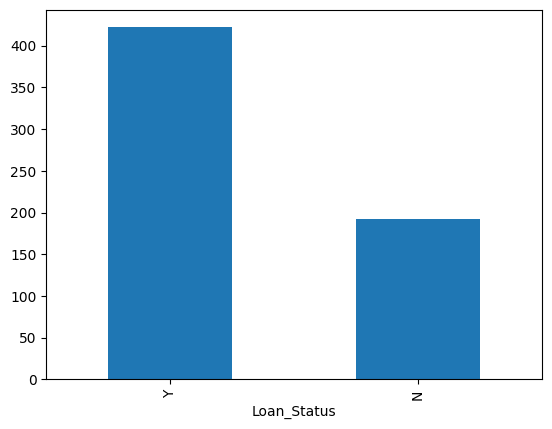

In [7]:
data['Loan_Status'].value_counts().plot(kind='bar')

In [9]:
data['Loan_Status'].value_counts(dropna=False,normalize=True).map('{:.2%}'.format)

,proportion
Loan_Status,
Y,68.73%
N,31.27%


In [12]:
categorical_cols=data.select_dtypes(include=['object']).columns.tolist()

In [14]:
data['Loan_Amount_Term'].dropna().unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [16]:
data['Credit_History'].dropna().unique()
categorical_cols.remove('Loan_ID')
categorical_cols=categorical_cols+['Loan_Amount_Term','Credit_History']
print(categorical_cols)

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Loan_Amount_Term', 'Credit_History']


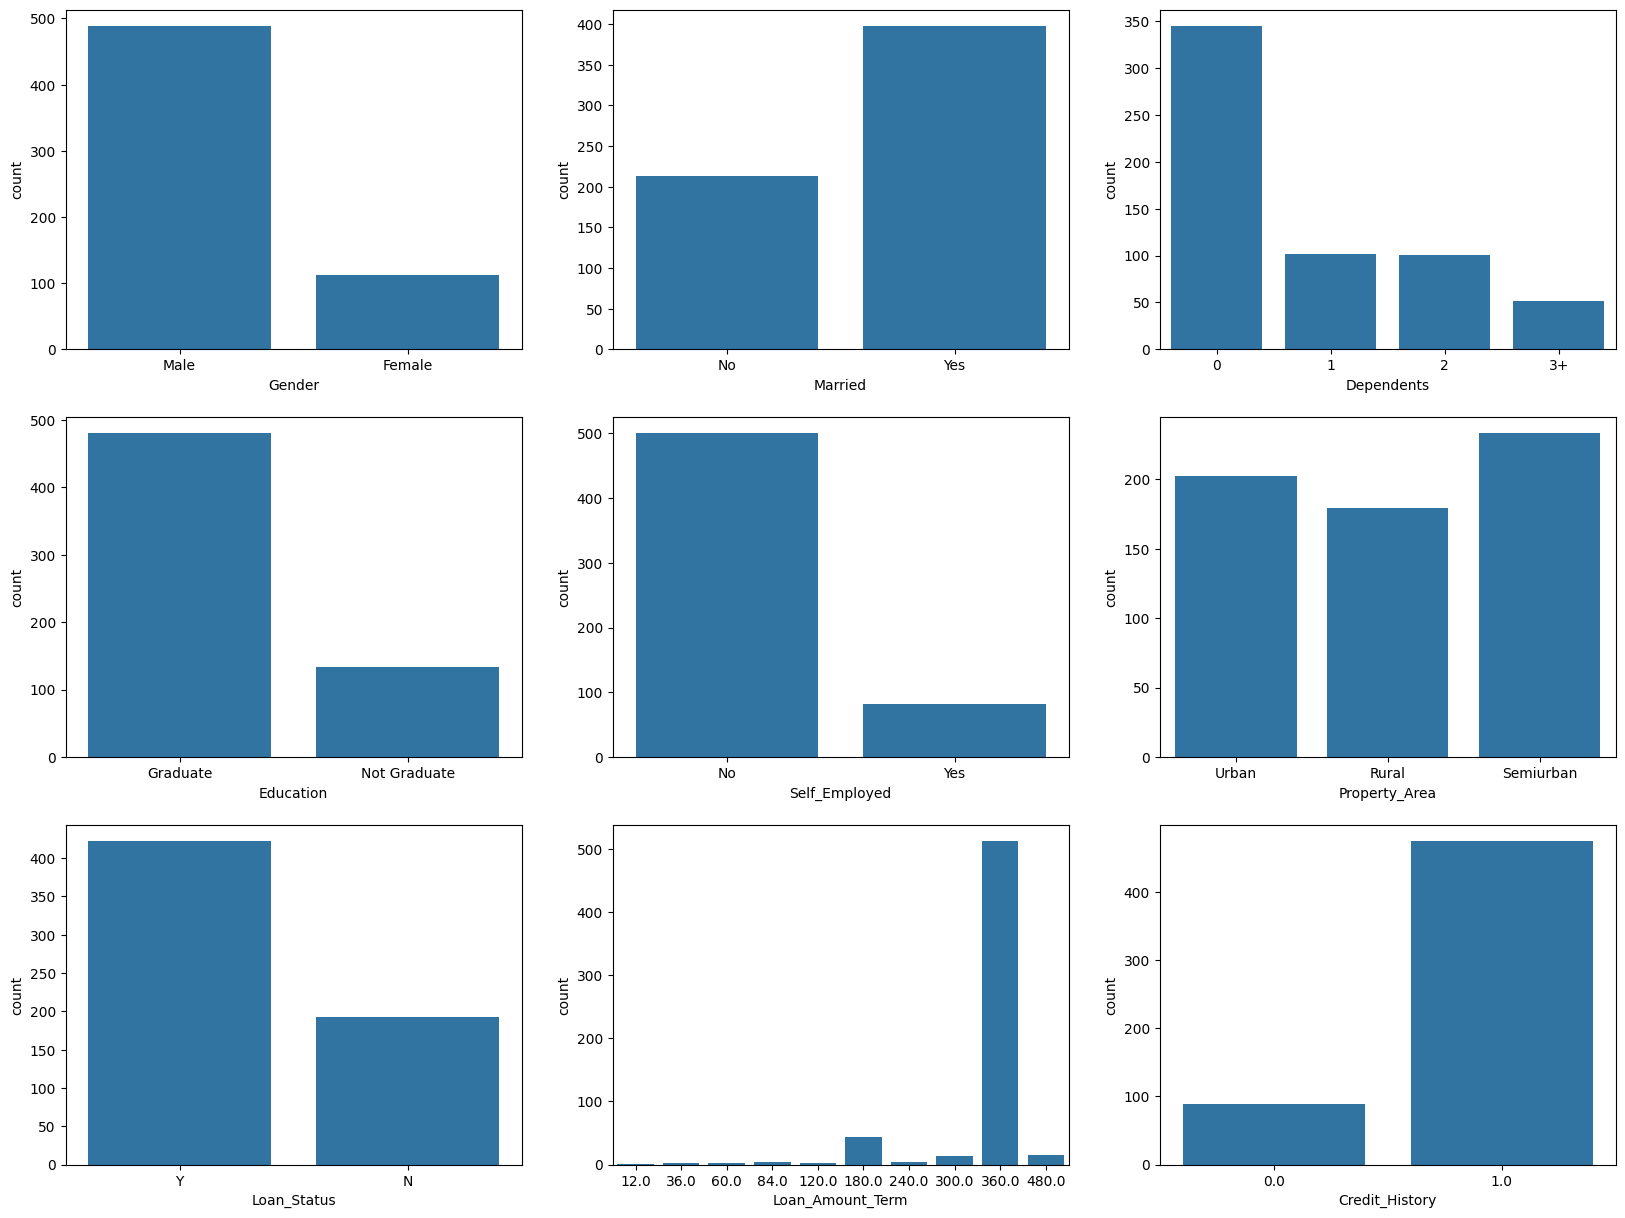

In [17]:
from re import sub
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(20,15))
for col,subplot in zip(categorical_cols, axes.flatten()):
  sns.countplot(x=data[col],ax=subplot)
plt.show()

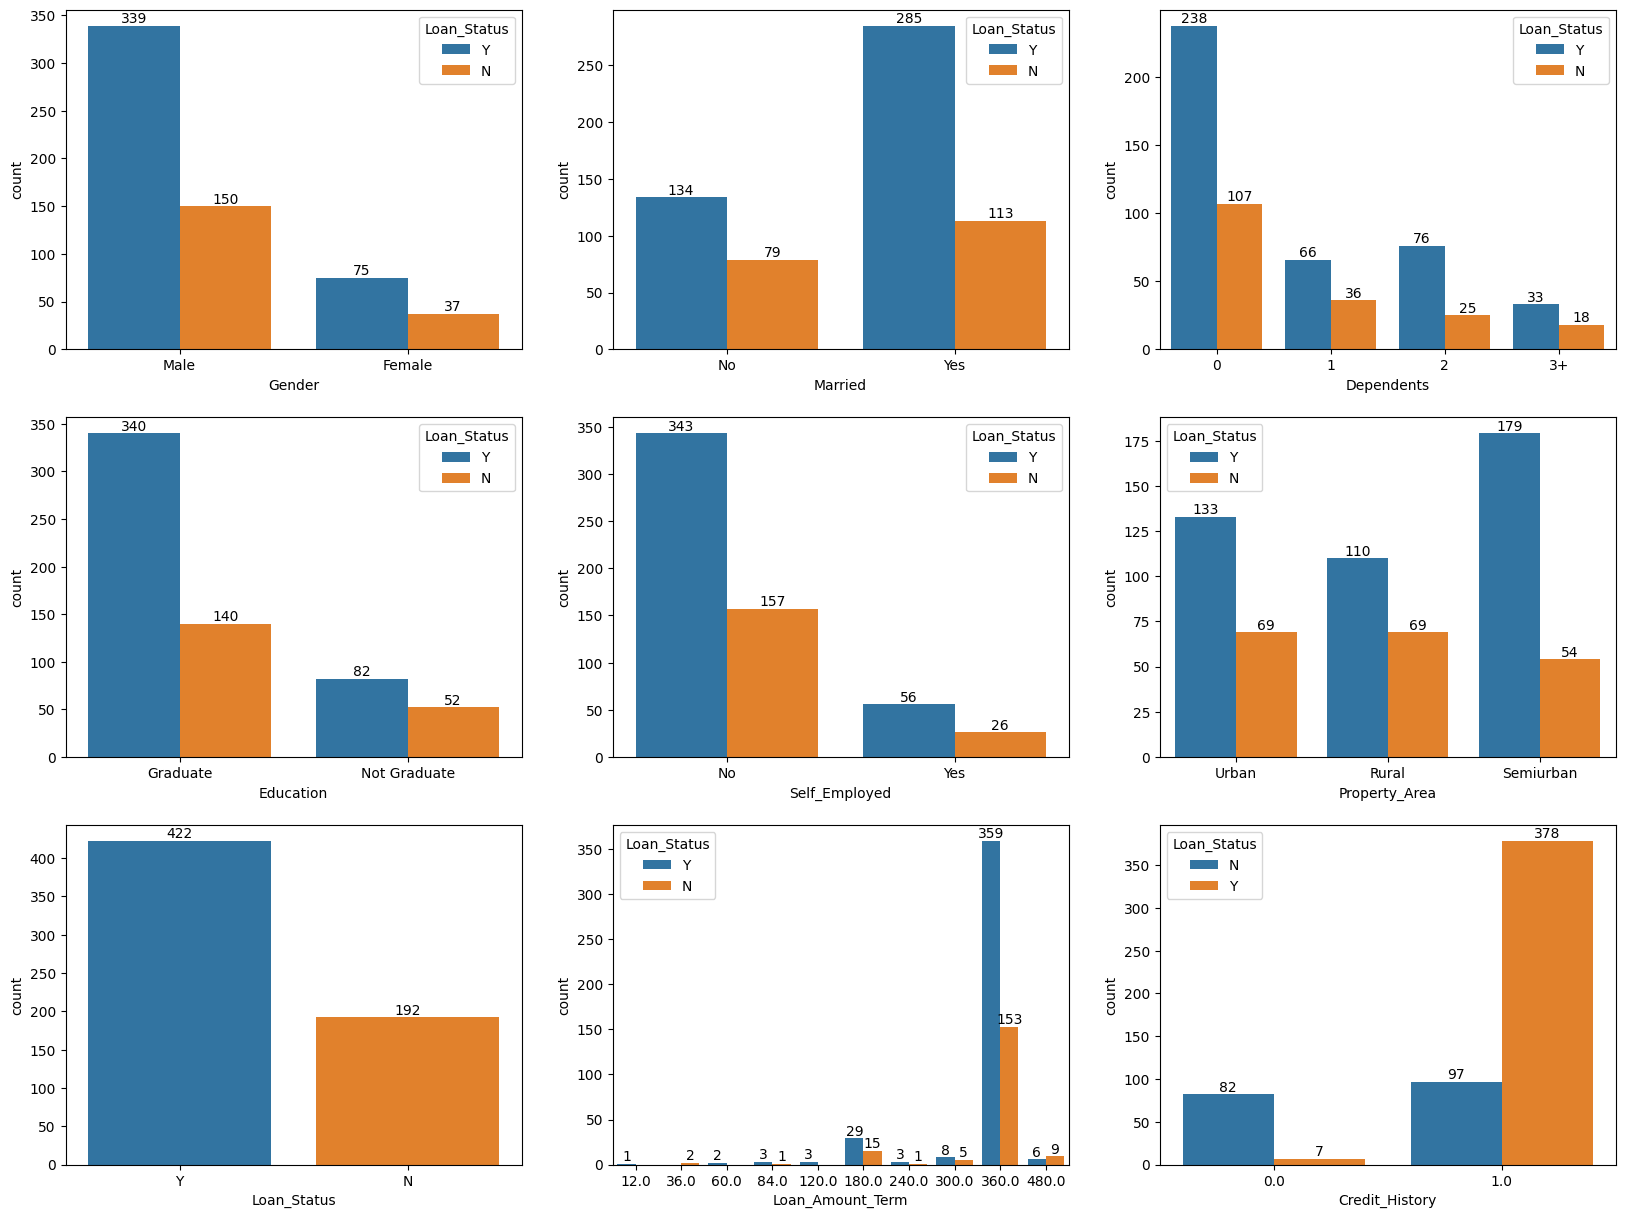

In [21]:

fig,axes=plt.subplots(nrows=3,ncols=3,figsize=(20,15))
for col,subplot in zip(categorical_cols, axes.flatten()):
  plot =sns.countplot(x=data[col],hue=data['Loan_Status'],ax=subplot)

  for container in plot.containers:
    plot.bar_label(container)
plt.show()

## Numerical Variables

In [23]:
print(data.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [26]:
numerical_col=['ApplicantIncome','CoapplicantIncome','LoanAmount']
data[numerical_col].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


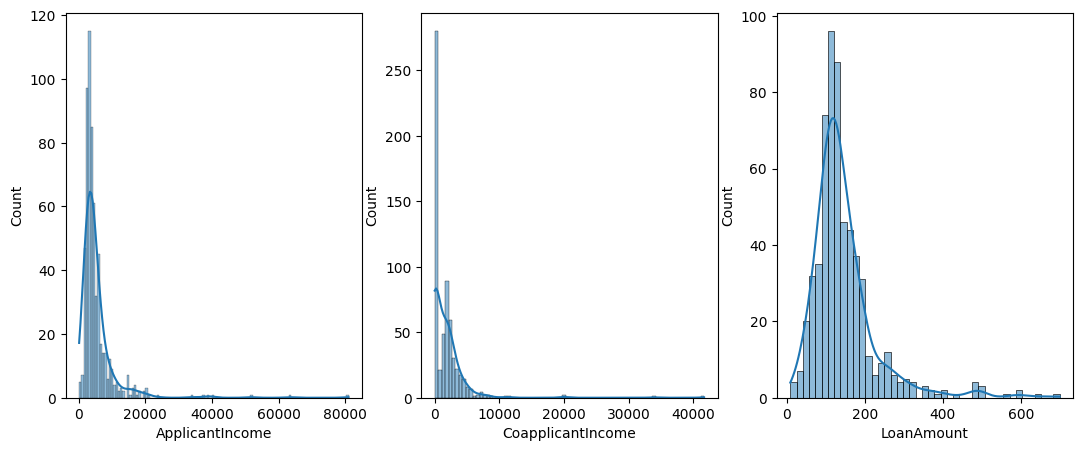

In [30]:
fig,axes=plt.subplots(ncols=3,figsize=(13,5))
for index,col in enumerate(numerical_col):
  sns.histplot(x=data[col],ax=axes[index],kde=True)
plt.show()

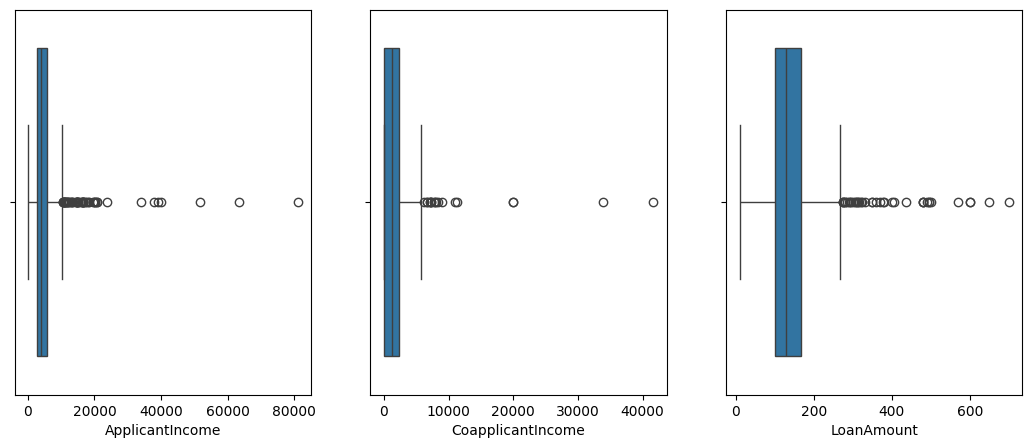

In [31]:
fig,axes=plt.subplots(ncols=3,figsize=(13,5))
for index,col in enumerate(numerical_col):
  sns.boxplot(x=data[col],ax=axes[index])
plt.show()

<Axes: >

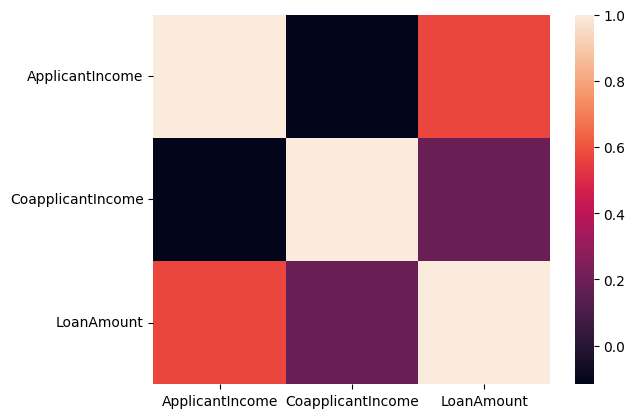

In [32]:
sns.heatmap(data[numerical_col].corr())

## Bivariant

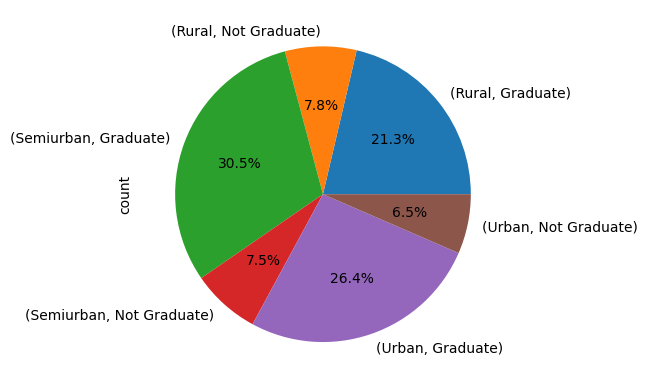

In [34]:
data.groupby('Property_Area').Education.value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

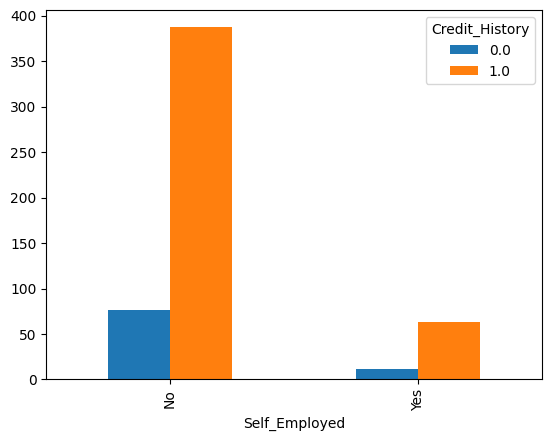

In [36]:
pd.crosstab(data['Self_Employed'],data['Credit_History']).plot.bar()
plt.show()

In [37]:
data.groupby('Education')['LoanAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
Graduate,465.0,154.060215,92.883366,9.0,103.0,132.0,176.0,700.0
Not Graduate,127.0,118.409449,39.773636,25.0,96.5,115.0,133.0,279.0


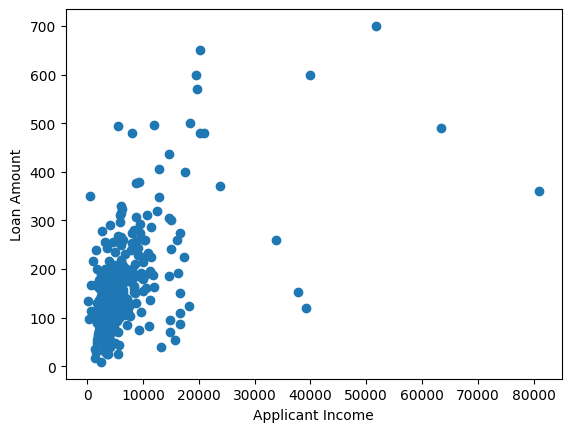

In [38]:
plt.scatter(data['ApplicantIncome'],data['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

<Axes: xlabel='Loan_Amount_Term'>

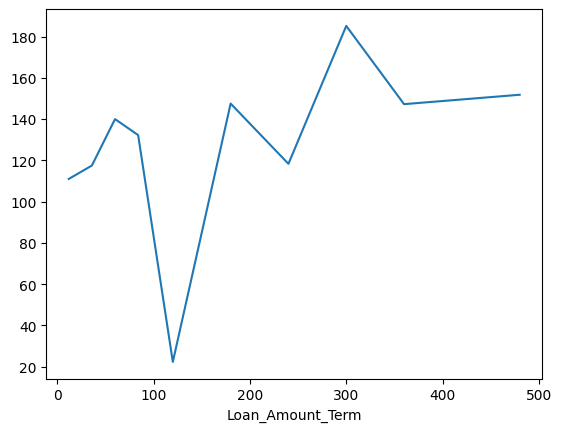

In [39]:
data.groupby('Loan_Amount_Term').LoanAmount.mean().plot()

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

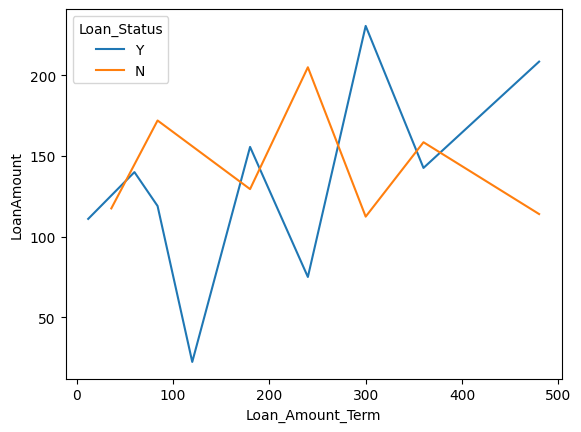

In [41]:
sns.lineplot(x=data['Loan_Amount_Term'],y=data['LoanAmount'],hue=data['Loan_Status'],errorbar=None)

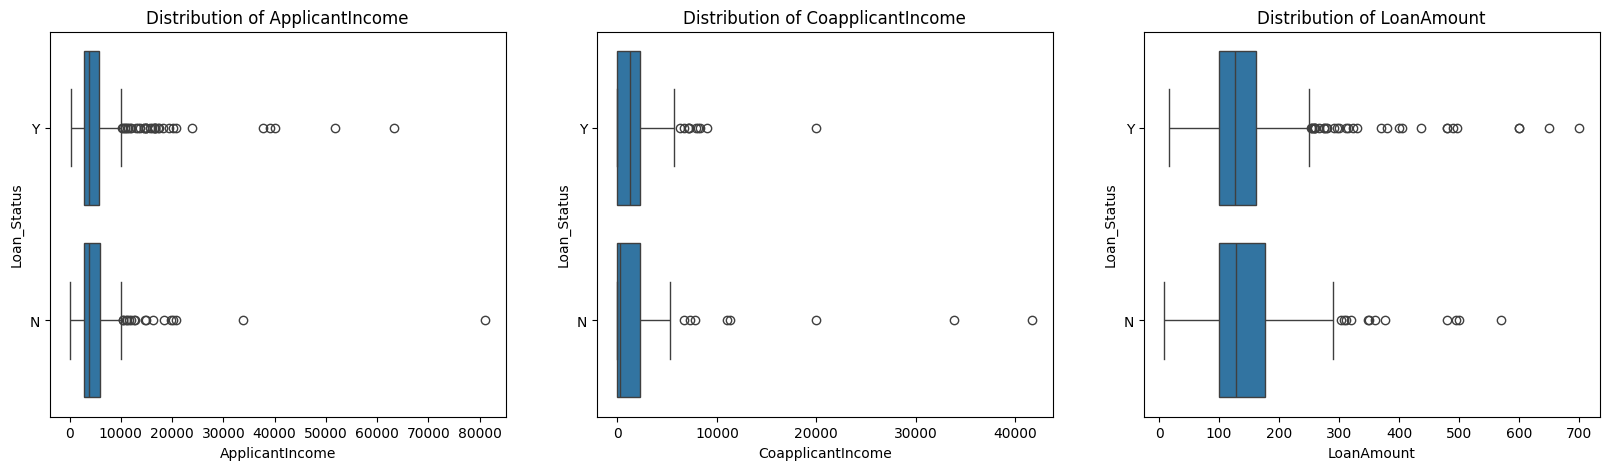

In [46]:
fig,axes=plt.subplots(ncols=3,figsize=(20,5))
for index,col in enumerate(numerical_col):
  sns.boxplot(x=data[col],y=data['Loan_Status'],ax=axes[index]).set(title=f'Distribution of {col}')
plt.show()

END OF EDA

## Data Preprocessing

In [ ]:
## CLEANING

In [47]:
data.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [49]:
null_count=data.isnull().sum()
null_cols=null_count[null_count>0].index.to_list()
null_cols

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [50]:
null_cols.remove('LoanAmount')

## IMPUTATION

In [52]:
def fillna_mode(col_name):
  data[col_name].fillna(data[col_name].mode()[0],inplace=True)

for col in null_cols:
  fillna_mode(col)

<ipython-input-52-7791b914c7b5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col_name].fillna(data[col_name].mode()[0],inplace=True)


In [53]:
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

<ipython-input-53-242d45367d87>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)


In [54]:
data.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


## OUTLIERS

<Axes: xlabel='LoanAmount'>

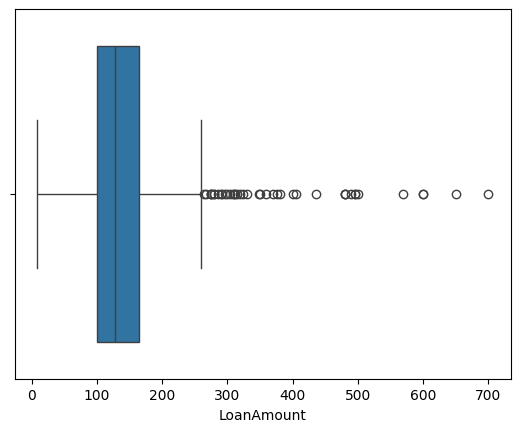

In [55]:
sns.boxplot(x=data['LoanAmount'])

Remove Outliers

In [56]:
n=numerical_col.copy()

q1=data[n].quantile(0.25)
q3=data[n].quantile(0.75)
iqr=q3-q1


data[n]=data[n][(data[n]>=(q1-1.5*iqr)) & (data[n]<=(q3+1.5*iqr))]
# lower_bound=q1-1.5*iqr
# upper_bound=q3+1.5*iqr

<Axes: xlabel='LoanAmount'>

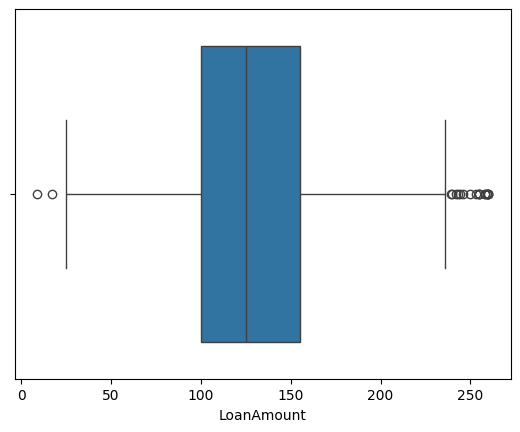

In [57]:
sns.boxplot(x=data['LoanAmount'])

## Square Root Transerformation to treat skew data

In [59]:
def sqrt_trandform(col):
  data[col]=(data[col])**(1/2)

for col in numerical_col:
  sqrt_trandform(col)

<Axes: ylabel='Density'>

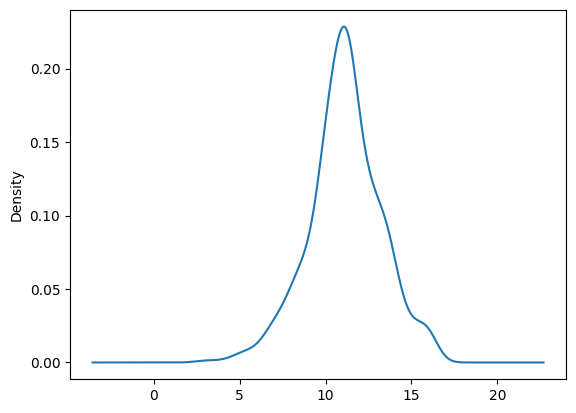

In [60]:
data['LoanAmount'].plot.kde()

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>], dtype=object)

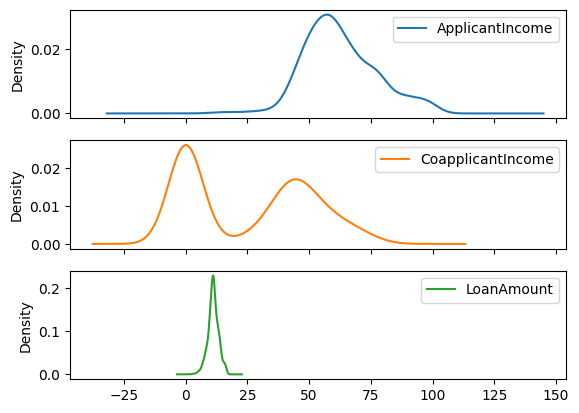

In [62]:
data[numerical_col].plot(kind='kde',subplots=True)

In [63]:
data[numerical_col].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,564.000000,596.000000,573.000000
mean,62.565293,25.637303,11.139134
std,14.514855,25.157895,2.100194
min,12.247449,0.000000,3.000000
25%,52.383109,0.000000,10.000000
50%,60.319876,32.109185,11.180340
75%,70.784769,46.615356,12.449900
max,100.692602,75.504967,16.124515


In [64]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,76.478755,0.000000,11.313708,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,360.0,1.0,Urban,Y


## Feature Selection

In [66]:
X=data.drop(['Loan_ID','Loan_Status'],axis=1)
y=data['Loan_Status']


## Feature Engneering

In [68]:
x_cat_cols=X.select_dtypes(include='object').columns
x_cat_cols

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

In [69]:
x_cat_cols=list(x_cat_cols)+['Loan_Amount_Term']


## Handle Category Data

In [71]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder


X[x_cat_cols]=X[x_cat_cols].apply(LabelEncoder().fit_transform)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,76.478755,0.000000,11.313708,8,1.0,2
1,1,1,1,0,0,67.697858,38.832976,11.313708,8,1.0,0
2,1,1,0,0,1,54.772256,0.000000,8.124038,8,1.0,2
3,1,1,0,1,0,50.823223,48.559242,10.954451,8,1.0,2
4,1,0,0,0,0,77.459667,0.000000,11.874342,8,1.0,2


In [72]:
data['Credit_History']=data['Credit_History'].astype(int)

## Feature Scaling

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X[numerical_col]=scaler.fit_transform(X[numerical_col])

In [74]:
X.sample()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
317,1,1,0,0,0,-1.186052,0.817843,-0.837941,8,1.0,2
